# Fit 2nd Order Polynomial to Oxford Weather Data

In [1]:
import pandas as pd
import numpy as np
import scipy.linalg
from plotnine import *

## Retrieve Oxford Weather Data

In [2]:
data = pd.read_csv('OxfordWeather.txt',
    names = ['year', 'month', 'maxTemp', 'minTemp', 'hoursFrost', 'rain', 'hoursSun'],
    header=None, delim_whitespace=True)
x = data['month'].values.reshape(-1, 1)
y = data['hoursSun'].values.reshape(-1, 1)

### Plot Oxford Weather Data

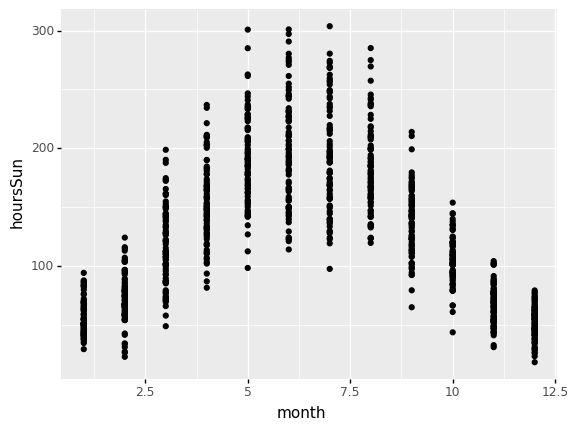

<ggplot: (8762210247415)>

In [3]:
(
    ggplot(data, aes(x='month', y='hoursSun')) +
    geom_point()
)

## QR Decomposition
Solve ||Ay-x||^2
### Create Matrix A

In [4]:
A = np.concatenate(
    [np.power(x, 2),
    x,
    np.ones(x.shape)], axis=1)

### QR Decomposition of A

In [5]:
Q, R = scipy.linalg.qr(A, mode='economic')

### Least Squares fit to ax^2+bx+c

In [6]:
beta = np.linalg.solve(R, Q.T @ y)
print(f'a = {beta[0, 0]:.3f}, b = {beta[1, 0]:.3f}, c = {beta[2, 0]:.3f}')

a = -4.968, b = 63.584, c = -16.655


### Plot Fit

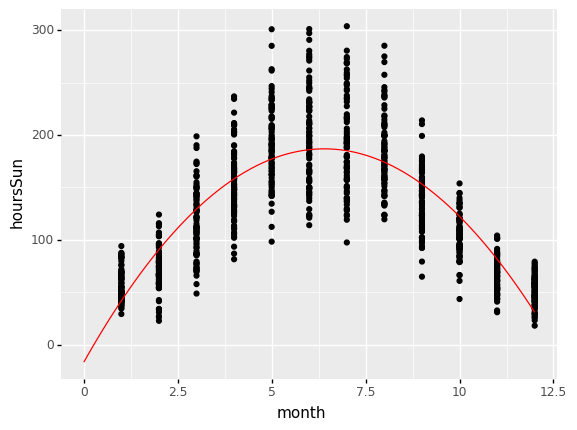

<ggplot: (8762208042174)>

In [7]:
months = np.linspace(0, 12, 100)
pred = np.stack([months**2, months, np.ones(months.shape)], axis=1) @ beta
(
    ggplot() +
    geom_point(data, aes(x='month', y='hoursSun')) +
    geom_line(pd.DataFrame(months, pred.reshape(-1)), aes(x='months', y='pred'), color='red')
)

### Compare to numpy.linalg.lstsq

In [8]:
beta_np = np.linalg.lstsq(A, y, rcond=None)[0]
print(f'QR Decomposition: a = {beta[0, 0]:.3f}, b = {beta[1, 0]:.3f}, c = {beta[2, 0]:.3f}')
print(f'Numpy lstsq:      a = {beta_np[0, 0]:.3f}, b = {beta_np[1, 0]:.3f}, c = {beta_np[2, 0]:.3f}')

QR Decomposition: a = -4.968, b = 63.584, c = -16.655
Numpy lstsq:      a = -4.968, b = 63.584, c = -16.655
